In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#confirmed cases of India

covid_history_json = pd.read_json(r"C:\Users\KC.MARK-50\Documents\coursera\AWS\build with serverless\Datasets\historicalDataInd.json")
covid_history_json.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,2020-01-30,1,0,0
1,0,0,0,2020-01-31,1,0,0
2,0,0,0,2020-02-01,1,0,0
3,1,0,0,2020-02-02,2,0,0
4,1,0,0,2020-02-03,3,0,0


In [3]:
covid_history_json.shape

(225, 7)

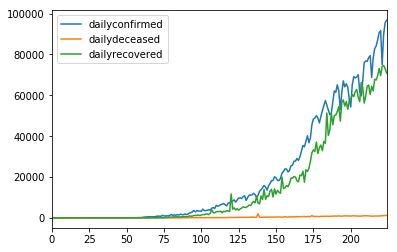

In [4]:
covid_history_json["dailyconfirmed"].plot()
covid_history_json["dailydeceased"].plot()
covid_history_json["dailyrecovered"].plot()
plt.legend()

In [5]:
covid_history_json.isnull().sum()

dailyconfirmed    0
dailydeceased     0
dailyrecovered    0
date              0
totalconfirmed    0
totaldeceased     0
totalrecovered    0
dtype: int64

In [6]:
#apple mobility dataset

mobility_data = pd.read_csv("https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/apple_reports/apple_mobility_report.csv")
mobility_data.head()

,country,sub-region,subregion_and_city,geo_type,date,driving,transit,walking
0,Albania,Total,Total,country/region,2020-01-13,0.00,NaN,0.00
1,Albania,Total,Total,country/region,2020-01-14,-4.70,NaN,0.68
2,Albania,Total,Total,country/region,2020-01-15,1.43,NaN,-1.07
3,Albania,Total,Total,country/region,2020-01-16,-2.80,NaN,-1.54
4,Albania,Total,Total,country/region,2020-01-17,3.55,NaN,0.85


In [7]:
#Break into countires/regions and cities numbers

geo_mask = mobility_data["geo_type"] == "country/region"
mobility_countries = mobility_data[geo_mask]
mobility_cities = mobility_data[~geo_mask]
print("There are a total of {} countires and {} cities with provided mobility data.".format(len(mobility_countries),len(mobility_cities)))

There are a total of 15435 countires and 210402 cities with provided mobility data.


In [8]:
# def get_trans_count(df):
#     name = mobility_data["geo_type"].iloc[0]
#     return mobility_data["driving"].value_counts().rename(str(name))
# transport_types_count = pd.concat([get_trans_count(mobility_countries), get_trans_count(mobility_cities)], axis=1, sort=False)
# transport_types_count

In [9]:
mobility_data.shape

(225837, 8)

In [10]:
mobility_data.info

<bound method DataFrame.info of         country sub-region subregion_and_city        geo_type        date  \
0       Albania      Total              Total  country/region  2020-01-13   
1       Albania      Total              Total  country/region  2020-01-14   
2       Albania      Total              Total  country/region  2020-01-15   
3       Albania      Total              Total  country/region  2020-01-16   
4       Albania      Total              Total  country/region  2020-01-17   
5       Albania      Total              Total  country/region  2020-01-18   
6       Albania      Total              Total  country/region  2020-01-19   
7       Albania      Total              Total  country/region  2020-01-20   
8       Albania      Total              Total  country/region  2020-01-21   
9       Albania      Total              Total  country/region  2020-01-22   
10      Albania      Total              Total  country/region  2020-01-23   
11      Albania      Total              Tota

In [11]:
mobility_data.describe()

,driving,transit,walking
count,225155.000000,98109.000000,171202.000000
mean,11.108197,-16.186352,5.367998
std,59.663845,50.896750,56.189419
min,-96.410000,-95.890000,-97.570000
25%,-23.070000,-50.710000,-31.580000
50%,5.140000,-20.370000,1.360000
75%,33.130000,8.170000,32.540000
max,1044.590000,613.860000,788.440000


In [12]:
print(mobility_data.geo_type.unique())

['country/region' 'city' 'sub-region']


In [13]:
# drop country/ region as it is not needed in the analysis

mobility_data = mobility_data.drop(['geo_type'], axis = 1)

In [14]:
#listing all the regions for which the data present
print(mobility_data.subregion_and_city.nunique())
regions = list(mobility_data.subregion_and_city.unique())
print(regions)

853
['Total', 'Buenos Aires', 'Australian Capital Territory', 'New South Wales', 'Sydney', 'Northern Territory', 'Brisbane', 'Queensland', 'Adelaide', 'South Australia', 'Tasmania', 'Melbourne', 'Victoria', 'Perth', 'Western Australia', 'Burgenland', 'Carinthia', 'Lower Austria', 'Salzburg', 'Graz', 'Styria', 'Tyrol', 'Upper Austria', 'Vienna', 'Vorarlberg', 'Antwerp', 'Antwerp Province', 'Brussels', 'East Flanders Province', 'Flemish Brabant Province', 'Hainaut Province', 'Limburg Province', 'Liège', 'Liège Province', 'Luxembourg Province', 'Namur Province', 'Walloon Brabant Province', 'West Flanders Province', 'Alagoas', 'Amazonas', 'Bahia', 'Ceará', 'Fortaleza', 'Distrito Federal (Brazil)', 'Espírito Santo', 'Goiás', 'Goiânia', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Belo Horizonte', 'Minas Gerais', 'Curitiba', 'Paraná', 'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Porto Alegre', 'Rio Grande do Sul', 'Rio de Janeiro', 'Rio de Janeiro (state)', 'Rondôni

In [15]:
mobility_data.head()

,country,sub-region,subregion_and_city,date,driving,transit,walking
0,Albania,Total,Total,2020-01-13,0.00,NaN,0.00
1,Albania,Total,Total,2020-01-14,-4.70,NaN,0.68
2,Albania,Total,Total,2020-01-15,1.43,NaN,-1.07
3,Albania,Total,Total,2020-01-16,-2.80,NaN,-1.54
4,Albania,Total,Total,2020-01-17,3.55,NaN,0.85


In [16]:
# covid_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# covid_data.head()

In [17]:
# Plot listed cities or countries per transport method

# import plotly.express as px
# #Make list of any cities to plot
# to_show = ["Atlanta", "Athens", "Albania"]

# #Plot
# df = mobility_cities_melted[mobility_cities_melted["region"].isin(to_show)]
# fig = px.line(df, x="Date", y="pct_of_baseline", color="transportation_type",
#               line_group="region", hover_name="region")
# fig.show()

In [18]:
# covid_geo_mask = covid_data["Country/Region"] == "Province/State"
# countries_cases = covid_data[covid_geo_mask]
# cities_cases = covid_data[~covid_geo_mask]
# print("There are a total of {} countires and {} cities with provided confirmed covid data.".format(len(countries_cases),len(cities_cases)))

In [19]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675


In [20]:
confirmed_table = confirmed_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed").fillna('').drop(['Lat', 'Long'], axis=1)
confirmed_table.head()

,Province/State,Country/Region,Date,Confirmed
0,,Afghanistan,1/22/20,0
1,,Albania,1/22/20,0
2,,Algeria,1/22/20,0
3,,Andorra,1/22/20,0
4,,Angola,1/22/20,0


In [21]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

death_table = death_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths").fillna('').drop(['Lat', 'Long'], axis=1)
death_table.head()

,Province/State,Country/Region,Date,Deaths
0,,Afghanistan,1/22/20,0
1,,Albania,1/22/20,0
2,,Algeria,1/22/20,0
3,,Andorra,1/22/20,0
4,,Angola,1/22/20,0


In [22]:
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered_table = recovered_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered").fillna('').drop(['Lat', 'Long'], axis=1)

recovered_table.head()

,Province/State,Country/Region,Date,Recovered
0,,Afghanistan,1/22/20,0
1,,Albania,1/22/20,0
2,,Algeria,1/22/20,0
3,,Andorra,1/22/20,0
4,,Angola,1/22/20,0


In [32]:
covid_table = confirmed_table.merge(death_table).merge(recovered_table)

covid_table['Date'] = pd.to_datetime(covid_table['Date'])
covid_table['Date'] = covid_table['Date'].dt.date
covid_table.head()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,2020-01-22,0,0,0
1,,Albania,2020-01-22,0,0,0
2,,Algeria,2020-01-22,0,0,0
3,,Andorra,2020-01-22,0,0,0
4,,Angola,2020-01-22,0,0,0


In [33]:
# confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
# death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# confirmed_table = confirmed_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed").fillna('').drop(['Lat', 'Long'], axis=1)
# death_table = death_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths").fillna('').drop(['Lat', 'Long'], axis=1)
# recovered_table = recovered_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered").fillna('').drop(['Lat', 'Long'], axis=1)

# covid_table = confirmed_table.merge(death_table).merge(recovered_table)

# covid_table['Date'] = pd.to_datetime(covid_table['Date'])
# covid_table

In [35]:
mobility_data.head()

,country,sub-region,subregion_and_city,date,driving,transit,walking
0,Albania,Total,Total,2020-01-13,0.00,NaN,0.00
1,Albania,Total,Total,2020-01-14,-4.70,NaN,0.68
2,Albania,Total,Total,2020-01-15,1.43,NaN,-1.07
3,Albania,Total,Total,2020-01-16,-2.80,NaN,-1.54
4,Albania,Total,Total,2020-01-17,3.55,NaN,0.85


In [40]:
start_date = '2020-01-13'
end_date = '2020-01-21'
mask = (mobility_data['date'] > start_date) & (mobility_data['date'] <= end_date)
mobility_data.loc[mask]

,country,sub-region,subregion_and_city,date,driving,transit,walking
1,Albania,Total,Total,2020-01-14,-4.70,NaN,0.68
2,Albania,Total,Total,2020-01-15,1.43,NaN,-1.07
3,Albania,Total,Total,2020-01-16,-2.80,NaN,-1.54
4,Albania,Total,Total,2020-01-17,3.55,NaN,0.85
5,Albania,Total,Total,2020-01-18,12.67,NaN,0.13
6,Albania,Total,Total,2020-01-19,4.83,NaN,-17.87
7,Albania,Total,Total,2020-01-20,-5.61,NaN,-4.35
8,Albania,Total,Total,2020-01-21,-5.93,NaN,-2.22
246,Argentina,Buenos Aires,Buenos Aires,2020-01-14,3.50,NaN,-4.15
247,Argentina,Buenos Aires,Buenos Aires,2020-01-15,7.53,NaN,-0.13


In [54]:


StartDate = '2020-01-21'
new_mobility_df = mobility_data.loc[mobility_data['date'] > StartDate]
new_mobility_df.reset_index(drop=True, inplace=True)
new_mobility_df.head()

,country,sub-region,subregion_and_city,date,driving,transit,walking
0,Albania,Total,Total,2020-01-22,-6.49,NaN,-4.61
1,Albania,Total,Total,2020-01-23,-7.06,NaN,-5.76
2,Albania,Total,Total,2020-01-24,2.13,NaN,-6.27
3,Albania,Total,Total,2020-01-25,2.38,NaN,-2.94
4,Albania,Total,Total,2020-01-26,1.41,NaN,-22.73


In [67]:
new_mobility_df.dtypes

country                object
sub-region             object
subregion_and_city     object
date                   object
driving               float64
transit               float64
walking               float64
dtype: object

In [56]:
covid_table.rename(columns = {'Country/Region':'country'}, inplace = True)
covid_table.head()

,Province/State,country,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,2020-01-22,0,0,0
1,,Albania,2020-01-22,0,0,0
2,,Algeria,2020-01-22,0,0,0
3,,Andorra,2020-01-22,0,0,0
4,,Angola,2020-01-22,0,0,0


In [68]:
covid_table.dtypes

Province/State    object
country           object
Date              object
Confirmed          int64
Deaths             int64
Recovered          int64
dtype: object

In [71]:
# df = pd.merge(new_mobility_df, covid_table, how = "inner" and (new_mobility_df.date == covid_table.Date))
df = new_mobility_df.merge(covid_table, how = 'inner', left_on = ['country', 'date'], right_on = ['country','Date'])
print(df)

Empty DataFrame
Columns: [country, sub-region, subregion_and_city, date, driving, transit, walking, Province/State, Date, Confirmed, Deaths, Recovered]
Index: []


In [59]:
df.to_csv('new_merged_table.csv')

In [ ]:
covid_table.rename(columns = {'Date':'date','Country/Region':'country'}, inplace = True)
covid_table.head()

In [ ]:
mobility_data.rename(columns = {'Date':'date'}, inplace = True)
mobility_data.head()

In [ ]:
merged_dates_table = pd.concat([mobility_data, covid_table])
# merged_dates_table = pd.merge(mobility_data, covid_table, on='date')
merged_dates_table


In [ ]:
merged_dates_table.shape

In [ ]:
merged_dates_table.to_csv('merged_table.csv')

In [ ]:

merged_left = pd.merge(left=mobility_data, right=covid_table, how='left', left_on=['date','country'], right_on=['country','date'])
merged_left
